In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr

%matplotlib inline

# Reading the data as an Excel file

In [5]:
df_without_columns = pd.read_excel('pone.0212445.s004.xlsx')
df_without_columns.head(2)

,"S4 Table. Direct survey domain and ""Fay-Heriott"" small area estimates of HIV prevalence and the numbers of people living with HIV (NoPLHIV) in the districts of South Africa obtained from Model 3. LCL and UCL denotes the lower and upper limits, respectively, of 95% confidence intervals.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
1,Buffalo City,BUF,Survey,13.6,10.268,16.932,102437,77340,127534


# Removing the supporting info and enabling first row as the header since it contains the features/columns

In [6]:
df = pd.read_excel('pone.0212445.s004.xlsx', header=1)
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


## Looking at the data to see the number of rows and data types of the columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
District          104 non-null object
Code              104 non-null object
Estimate          104 non-null object
Prevalence_%      104 non-null float64
Prevalence_LCL    104 non-null float64
Prevalence_UCL    104 non-null float64
NoPLHIV           104 non-null int64
NoPLHIV_LCL       104 non-null int64
NoPLHIV_UCL       104 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


Checking to see if are the any missing values in the data, if there are, they will be indicated by yellow shade, otherwise, purple shade

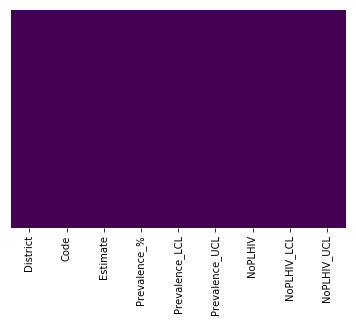

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Answer to Question 2a)

In [65]:
print("total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate is:") 
print(df[df['Estimate'] == "Survey"].groupby(['District'])[['NoPLHIV']].sum()['NoPLHIV'].sum())

total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate is:
6409903


# Answer to Question 2b)

In [66]:
print("The average NoPLHIV of the two estimates used for “Xhariep” is:") 
print(df[df['District'] == "Xhariep"].groupby(['Estimate'])[['NoPLHIV']].sum().reset_index().iloc[:,1].mean())

The average NoPLHIV of the two estimates used for “Xhariep” is:
12247.5


# Answer to Question 2c)

Adding a new column named "No_PLWITHOUTHIV" for the total number of people not living with HIV per district and row

In [67]:
df['No_PLWITHOUTHIV'] = (((df['NoPLHIV'] * 100 ) / df['Prevalence_%'] )-df['NoPLHIV'])
df['No_PLWITHOUTHIV'] = df['No_PLWITHOUTHIV'].apply(lambda x: '%.5f' % x)
df.head(10)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,No_PLWITHOUTHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,650776.23529
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651516.87926
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3659845.15385
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178.28407
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,407290.59259
5,West Coast,DC1,Fay-Heriott,4.088319,2.414351,6.841548,17114,10107,28639,401493.23580
6,Cacadu,DC10,Survey,7.600000,3.484000,11.716000,34732,15922,53542,422268.00000
7,Cacadu,DC10,Fay-Heriott,8.912387,6.145010,12.756646,40729,28083,58298,416264.17476
8,Amatole,DC12,Survey,11.000000,7.276000,14.724000,98884,65407,132361,800061.45455
9,Amatole,DC12,Fay-Heriott,11.878608,9.090702,15.376883,106783,81721,138230,792169.11222


# Answer to Question 2d)


In [68]:
print("total number of people living with HIV (NoPLHIV) in the listed cities containing the district with word 'metro' or 'city' is:") 
print(df[(df['District'].str.contains('City')) | (df['District'].str.contains('Metro'))]['NoPLHIV'].sum())

total number of people living with HIV (NoPLHIV) in the listed cities containing the district with word 'metro' or 'city' is:
2572733


# Answer to Question 3: Writing to a CSV file with the new columns


In [63]:
df.to_csv('palindrome_data.csv')